In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, roc_auc_score
)

In [2]:
df = pd.read_csv("Heart Disease.csv")


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.shape

(908, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

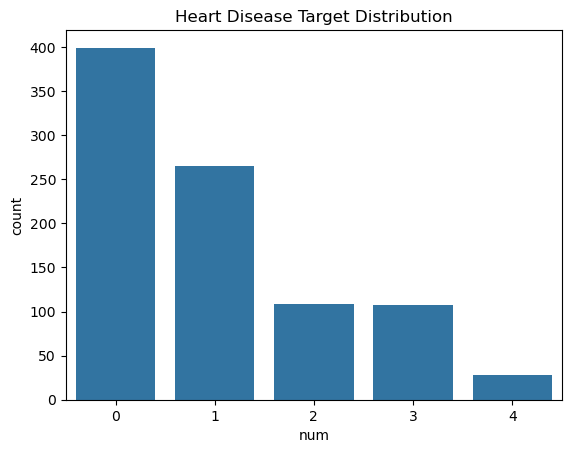

In [11]:
sns.countplot(x='num', data=df)
plt.title("Heart Disease Target Distribution")
plt.show()

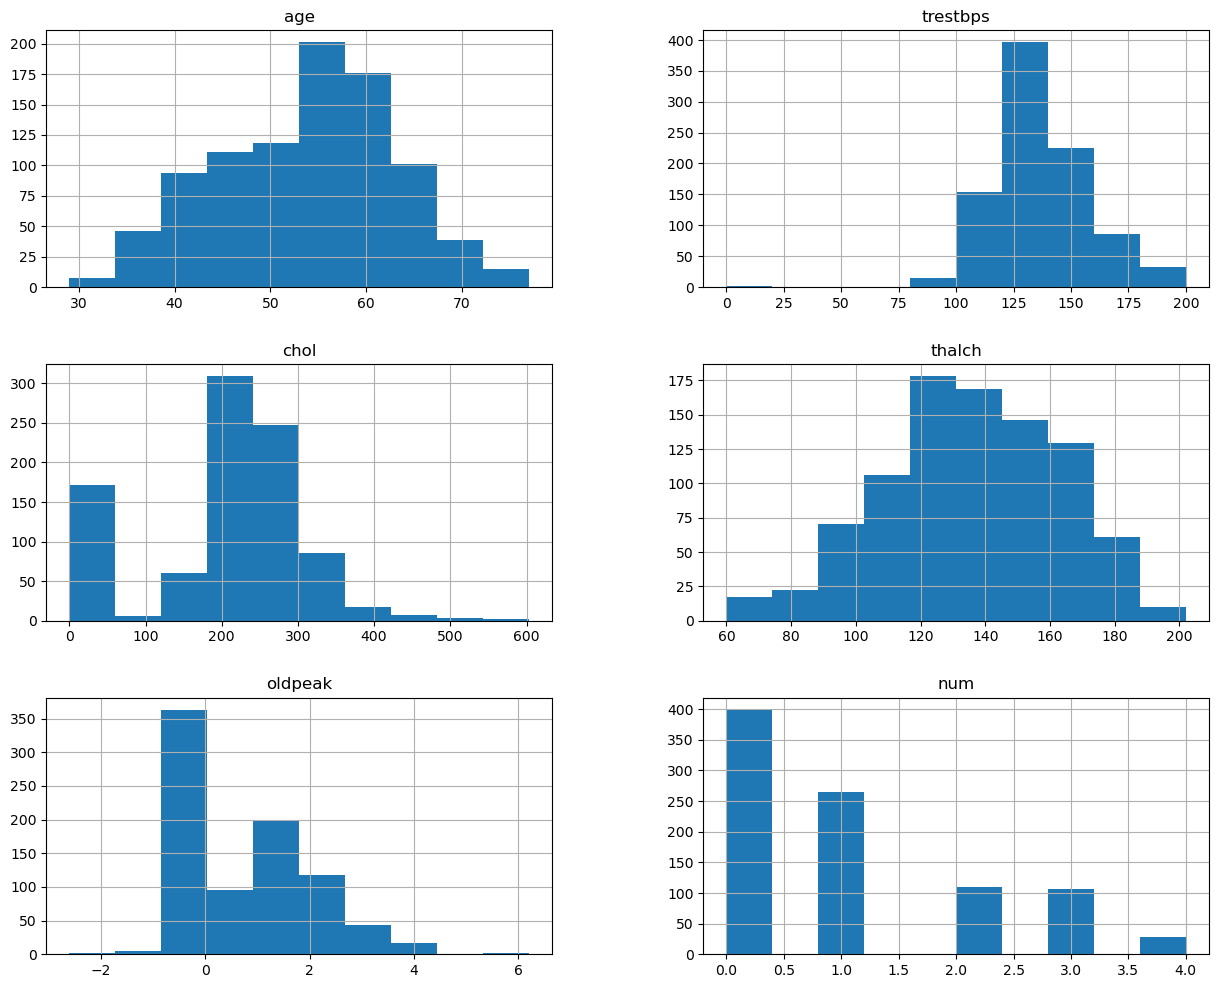

In [12]:
df.hist(figsize=(15,12))
plt.show()

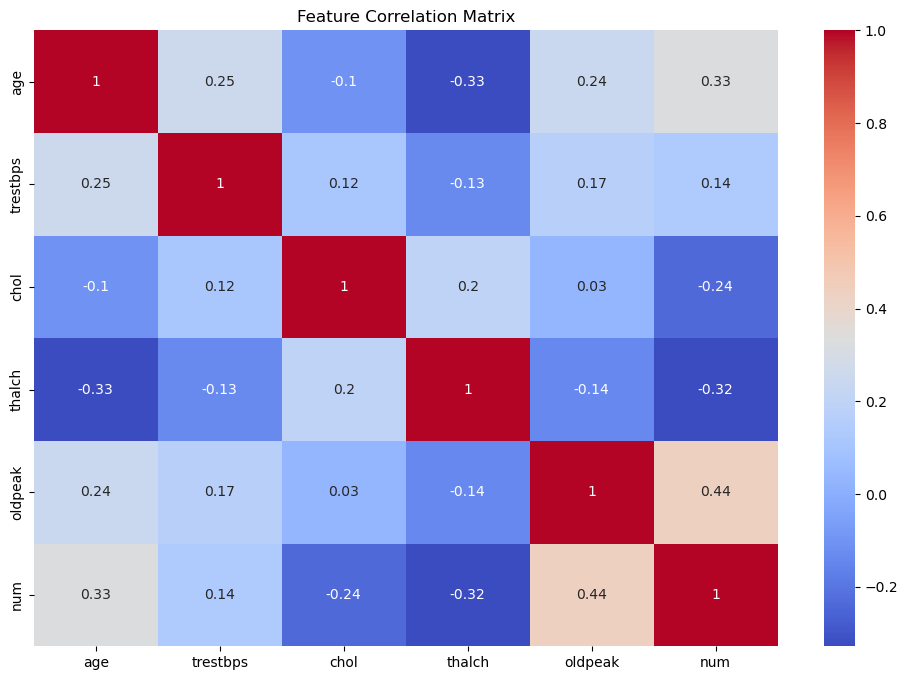

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [22]:
X.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
dtype: object

In [23]:
X.select_dtypes(include='object').columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [25]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs            bool
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

In [26]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('num', axis=1)
y = df['num']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7252747252747253
Precision: 0.7549019607843137
Recall: 0.7549019607843137
F1 Score: 0.7549019607843137
ROC-AUC: 0.7212009803921569

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        80
           1       0.75      0.75      0.75       102

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.73      0.73       182



In [30]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [31]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [32]:
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

y_pred_best = best_dt.predict(X_test)
y_prob_best = best_dt.predict_proba(X_test)[:, 1]

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

Accuracy: 0.7087912087912088
Precision: 0.7634408602150538
Recall: 0.696078431372549
F1 Score: 0.7282051282051282
ROC-AUC: 0.7548406862745098


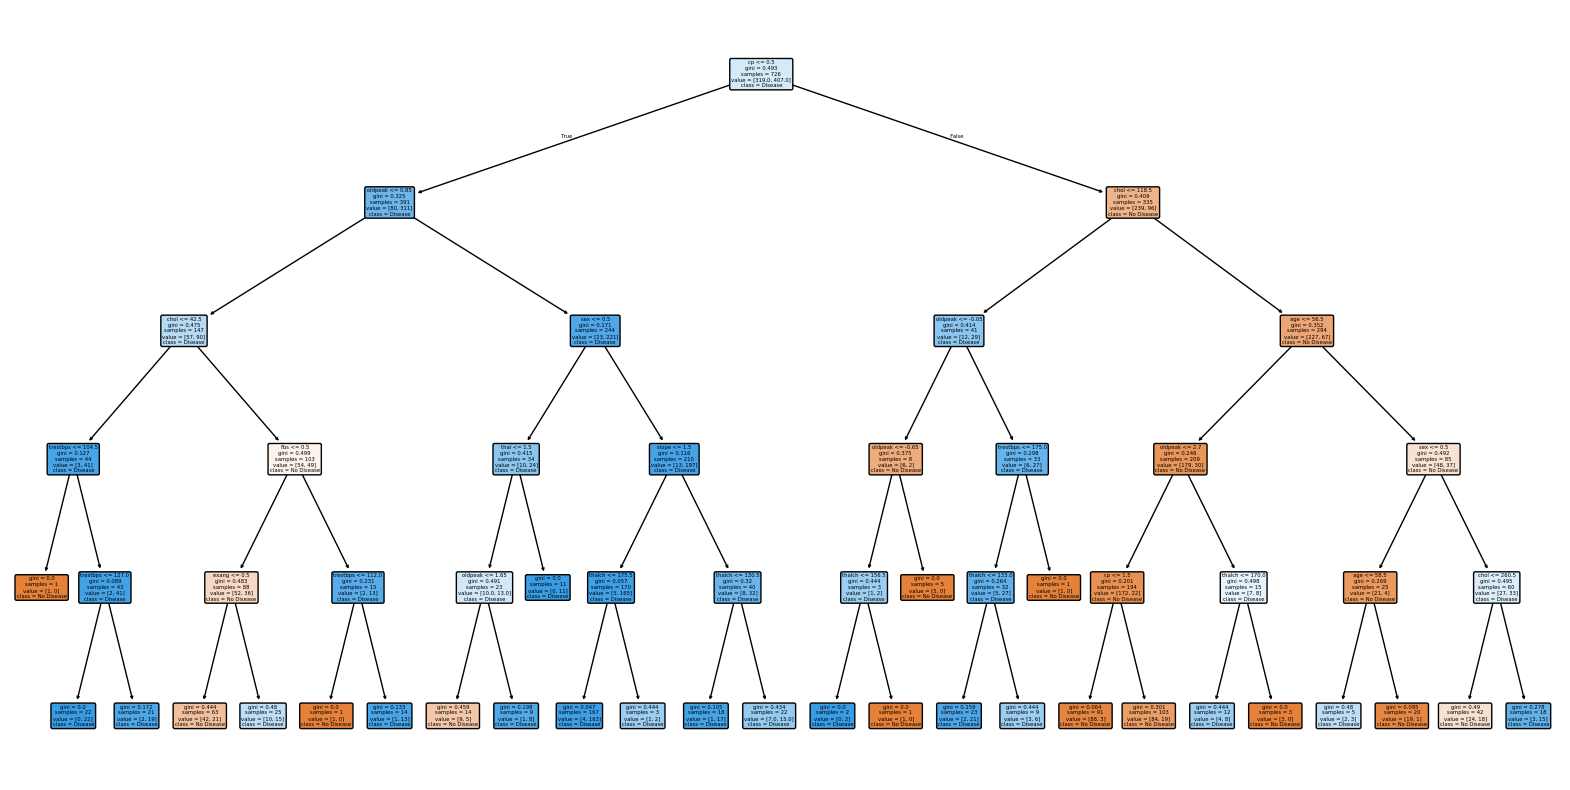

In [34]:
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True
)
plt.show()

In [35]:
feature_importance = pd.Series(
    best_dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

cp          0.469388
chol        0.164390
oldpeak     0.145448
age         0.062362
sex         0.041834
thalch      0.030339
fbs         0.026338
trestbps    0.024353
thal        0.013807
exang       0.012492
slope       0.009249
restecg     0.000000
dtype: float64

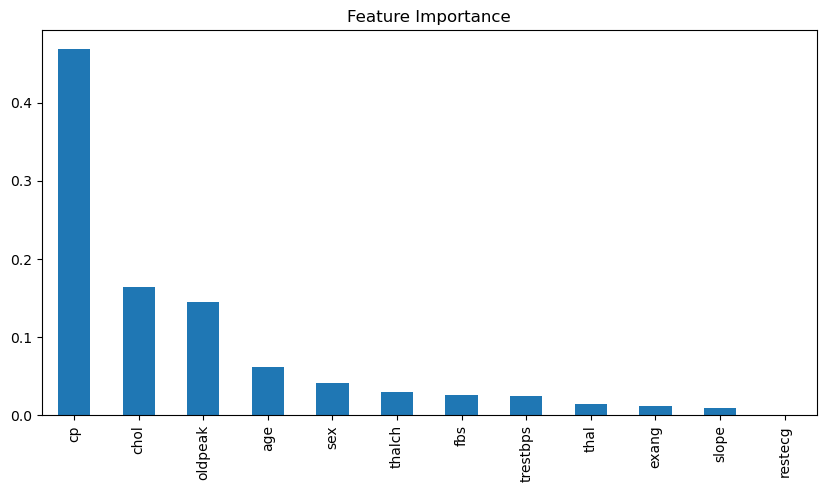

In [36]:
feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()